###Phương pháp số trong khoa học dữ liệu 
###Nguyễn Đức Vũ Duy - 18110004

In [1]:
#Import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import random

###Tạo bộ dữ liệu tuyến tính

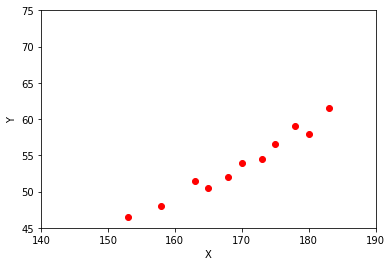

(13, 1)

In [2]:
#Creating data
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
#Creating target
y = np.array([[ -33+0.5*i[0] + random.randint(1,3) for i in X]]).T
#plot some dataset
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
y.shape

###Train linear regression hay chính là giải bài toán tuyến tính bằng MLE

-28.038201296870604
0.4826614040033831
{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': False}


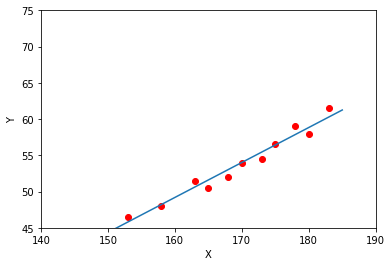

In [3]:
#Import linear Regression
from sklearn.linear_model import LinearRegression

#adding one columns to X
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

#Train linear regression
lr=LinearRegression(fit_intercept=False)
lr.fit(Xbar,y)
w0=lr.coef_[0][0]
w1=lr.coef_[0][1]
print(w0)
print(w1)
print(lr.get_params())

x0 = np.linspace(145, 185, 2)
y0 = w0 + w1*x0

#Plot the data and fitting line
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
#score of linear regression
lr.score(Xbar,y)

0.9783715721603852

###Train bằng ridge regression hay chính là giải bài toàn MAP

-1.5569323159789492
0.32422424984914716
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


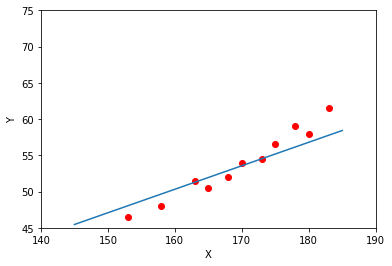

In [5]:
#Import Ridge regression
from sklearn.linear_model import Ridge

#Train ridge regression
clf = Ridge(fit_intercept=False,alpha=1.0)
clf.fit(Xbar, y)

w_0=clf.coef_[0][0]
w_1=clf.coef_[0][1]
print(w_0)
print(w_1)
print(clf.get_params())

x_0 = np.linspace(145, 185, 2)
y_0 = w_0 + w_1*x_0

#Plot dataset and fitting line
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x_0, y_0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
clf.score(Xbar,y)

0.8724708589970606

###So sánh kết quả

score of linear regression:  0.9783715721603852
score of ridge regression:  0.8724708589970606


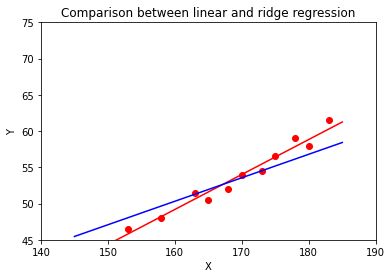

In [7]:
print('score of linear regression: ',lr.score(Xbar,y))
print('score of ridge regression: ',clf.score(Xbar,y))

#Ta có thể thấy là score của ridge regression nhỏ hơn so với linear regression

#Ta sẽ vẽ plot fitting line của 2 hồi quy.
plt.plot(X.T, y.T, 'ro')    
plt.plot(x0, y0,color='red')   # the fitting line of linear regression
plt.plot(x_0,y_0,color='blue') #The fitting line of ridge regression
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison between linear and ridge regression')
plt.show()

#Ta có thể thấy 2 đường cách khá gần nhau. Khi thay tham số alpha = 0.0 thì 2 đường trùng nhau.
#Nghĩa là với alpha =0 thì linear regression với ridge regression là 1 và lúc này MAP không có 
#phân phối tiền nghiệm (priori).